In [49]:
import pandas as pd
import paths as P
import json

In [50]:
data = pd.read_csv('out.csv')

In [51]:
def read_cluster(df, i):
    col_list = df[i].tolist()
    col_set = set()
    for phrase in col_list:
        if type(phrase) == str:
            col_set.add(phrase)
    return col_set

In [52]:
all_clusters = dict()
for col in data.columns.tolist():
    boom = read_cluster(data, col)
    all_clusters[int(col)] = list(boom)


In [53]:
len(all_clusters)

20

In [54]:
train_dir = f'{P.annotations_path}train.json'

with open(train_dir, 'r') as jsonfile:
    train_data = json.load(jsonfile)

In [55]:
which_group_which_caption = dict()

for a in train_data['annotations']:
    cap = a['caption']
    img_id = a['image_id']
    if img_id not in which_group_which_caption:
        which_group_which_caption[img_id] = dict()
    for cluster_nr, phrases in all_clusters.items():
        for phrase in phrases:
            if phrase in cap:
                if cluster_nr not in which_group_which_caption[img_id]:
                    which_group_which_caption[img_id][cluster_nr] = 0
                which_group_which_caption[img_id][cluster_nr] += 1


In [56]:
# Function to determine which image can be classified as which group
# if there's only one relevant group: keep that
# otherwise: keep biggest.
# later stage: check for other groups.

def keyswithmaxval(d):
    if len(d) == 1:
        return list(d.keys())
    k = list(d.keys()); v = list(d.values())
    indices = [i for i, x in enumerate(v) if x == max(v)]
    important_groups = list()
    for i in indices:
        important_groups.append(k[i])
    return tuple(important_groups)

In [58]:
new_json = dict()

for img in which_group_which_caption:
    # new_json[img] = dict()
    groups = which_group_which_caption[img]
    new_json[img] = keyswithmaxval(groups)

    # print(groups)
    # for g in groups:
    #     relevant = keyswithmaxval(g)
            # print(img, g, groups[g])

print(len(new_json) == len(which_group_which_caption))

True


In [105]:
D = dict()

for img in new_json:
    for group in new_json[img]:
        if group not in D:
            D[group] = 0
        D[group] += 1

print(len(D))

20


In [108]:
for img in new_json:
    if len(new_json[img]) > 1:
        if 6 or 10 in new_json:
            remove_six = list()
            for g in new_json[img]:
                if g != 6 or 10:
                    remove_six.append(g)
            new_json[img] = tuple(remove_six)

In [110]:
Dplus = dict()

for img in new_json:
    for group in new_json[img]:
        if group not in Dplus:
            Dplus[group] = 0
        Dplus[group] += 1

print(len(Dplus))

20


<AxesSubplot:>

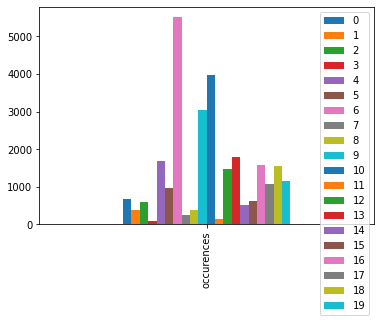

In [111]:
df = pd.DataFrame(Dplus, index=['occurences'])
df = df.reindex(sorted(df.columns), axis=1)
df.plot(kind='bar')

In [65]:
with open("pretty_output2.json", 'w') as out:
    json.dump(new_json, out, indent=2)